In [1]:
import numpy as np
import json
import pandas as pd
import matplotlib as plt
import seaborn as sns

from itertools import product
from collections import Counter

In [2]:
from scripts.data_processing import GameResponses, Demographics

In [8]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

# Use a service account
cred = credentials.Certificate('E:/Behavioural cybersecurity/project-notes/cards-dd-game-61b9b7f26a6e.json')
firebase_admin.initialize_app(cred)

db = firestore.client()

subjects_ref = db.collection(u'subjects')

In [ ]:
# ########### TMP ###############
# uuids = [
#     '6108512871ec370e525ef4f0', # 32
# '611e717148e6b271f0b70d6f', # 31
# '5f415bea2ba0682e7fc98fbf', # 31
# '611e6e0371738becff3551d8', # 22
# '6112b4cdd72db936075c0db8', # 21
# '611e4e160f41977f737035ef', # 21
# '60ff0201788cef38c8695833', # 12
# '6115e7dcd6cecc981dde3ed6', # 12
# '611e28b12a630ff00cc467a8' # 11
# ]

In [ ]:
# uuids = [ # corrected same players condition
#     '54b9acd9fdf99b34ce2578f9',
#     '61017dbbf8b1afba48b7822e',
#     '6116aa4d3c4d9eae26b66171',
#     '6109b8238588407db4764ec1',
#     '611841738f4e8342f5ba3765',
#     '6108649840bf2b927ef3905c',
#     '5f4f8e8f9213e9056223e128',
#     '613290e8a4520dd8d0cc061a',
#     '61217de916b53da848302312',
#     '61338d61ed3f2e3d196fa7c7'
# ]

# uuids = [ # different players condition
#     '61005d2e9b8bac27eba5b984',
# '610995bd91de0e899effd73d',
# '599186630675b100014daddd',
# '6119884fd696463d717432c9',
# '610bb05be2e705f3e47e87fb',
# '610824959b488e57fa8a4a33',
# '60f0937892bd49086d6e2a77',
# '5cf656e90acc8f000147f643',
# '5fe292a28fd71dea34d04453',
# '5d341b57a48ae7000114152a'
# ]

In [167]:
batch1 = [
        "6110e7ae08023ecb9207b05e",
"5fec7577ad8fbadf15cd5607",
"615f1500b60d25e2660e8644",
"615ec4f34cb81d7e58fa144c",
"5cd5fe480f0de600018e7251",
"60f44f7a57468d4e9f87fa5b",
"6160011304f5319ece189bfa",
"5af196e1e1b5b8000148ac76",
"6154284fc5154abb9a264b0c",
"6147d726fa94eb7d5c2de156",
"6160403f5164508979e6358d",
"56210effed6e5a000ac7f3a5",
"6156ee007bdef87eb5b4aeb0",
"61085b8ec672d0e88151d5ae",
    "57313ba2070de6000f43384e",
    "615d9f86fdd5e127d783e850",
"614f23537aab4e64abfd53ae",
"61533356ce435e5a4a4addd0",
"6152218517a89c5b41e18a06",
"615f0726cbd12330a2d82556",
        "6169c2dc0d5361fbf96713f4",
"5d8a1081323cf30001205f53",
"5a455b091950a80001e7c49a",
"5afc4671bb36f900018ef1fe",
"6169a6bf5372000629b20879", 
"616d3d7cbf9e78d1a6e3219e",
"61667ad3d3c29f487b65cd45",
"614cd4d65c8c90077afbe40f",
"616ae1d6b676edf5f6ae8351", # no feedback received
"5f96efef011b8c01fd34a9eb",
"616d2d6c9c76109cd9aa68e7",
"612812ff639db35356dff7c5",
"616b075e487d1ad05543166e",
"613bea209464d339e18036d4",
"616d50ac138442ad3ad08b0e",
"614f0cfd6a0b72631a010f7a",
"5962eb69241f8d0001064bd3",
"61617a80475c4e619cbed83e",
"616b0e47afca47d3d1a99499",
"5ef7d6c359b38851de122110"
]

In [4]:
uuids = [
    #batch1
    "6110e7ae08023ecb9207b05e",
"5fec7577ad8fbadf15cd5607",
"615f1500b60d25e2660e8644",
"615ec4f34cb81d7e58fa144c",
"5cd5fe480f0de600018e7251",
"60f44f7a57468d4e9f87fa5b",
"6160011304f5319ece189bfa",
"5af196e1e1b5b8000148ac76",
"6154284fc5154abb9a264b0c",
"6147d726fa94eb7d5c2de156",
"6160403f5164508979e6358d",
"56210effed6e5a000ac7f3a5",
"6156ee007bdef87eb5b4aeb0",
"61085b8ec672d0e88151d5ae",
    "57313ba2070de6000f43384e",
    "615d9f86fdd5e127d783e850",
"614f23537aab4e64abfd53ae",
"61533356ce435e5a4a4addd0",
"6152218517a89c5b41e18a06",
"615f0726cbd12330a2d82556",
        #batch2
    "6169c2dc0d5361fbf96713f4",
"5d8a1081323cf30001205f53",
"5a455b091950a80001e7c49a",
"5afc4671bb36f900018ef1fe",
"6169a6bf5372000629b20879", 
"616d3d7cbf9e78d1a6e3219e",
"61667ad3d3c29f487b65cd45",
"614cd4d65c8c90077afbe40f",
"616ae1d6b676edf5f6ae8351", # no feedback received
"5f96efef011b8c01fd34a9eb",
"616d2d6c9c76109cd9aa68e7",
"612812ff639db35356dff7c5",
"616b075e487d1ad05543166e",
"613bea209464d339e18036d4",
"616d50ac138442ad3ad08b0e",
"614f0cfd6a0b72631a010f7a",
"5962eb69241f8d0001064bd3",
"61617a80475c4e619cbed83e",
"616b0e47afca47d3d1a99499",
"5ef7d6c359b38851de122110",
     #batch3
    "6151e17dd596caee8fc6b73c",
"5efd22056ec55516587f32a6",
"615630fc8d505b023ba5de4f",
"5f24794d55695f0549163e86",
"6168983cf2f14b393f06c50a",
"616d53892b58b6e0388ab050",
"5e6d395882be80000cec9f92",
"616deadcefd7197b84ab677c",
"616f43682df7bc3f99f95411",
"614f40be2fd4052c9f0990fe",
"616c96b3a5db6313464f8d8d",
"6162a881b823e80dfcf94792",
"605116da9a3b2d13a44665a0",
"6166d329ed4a00458e660e87",
"616f6a2135e569c0b4861b01",
"616b05332ad106da01d79fa8",
"6169d947c10b18bb9541b6d9",
"5cfb74958f650700151c7df3",
"6169254bcae807672de29c2d",
"6110aac49542b99f9bd6c09b",
        #batch4
    "5b98d9362cca9c0001de161f",
"6123d102b713b8a947fd2eb2",
"6157b4423b44be8c20642f98", 
"5cb08ecee11a890001a478ad",
"613e157ccd6af6049001ce25",
"615df1b1d27e6932fca18dfa",
"6160f30a9b243350dd593650",
"6166208d9c58ef96862ffd1e",
"6158d28aa4775c94baebd9f6",
"5ea91fe115728f3d0f6b7d17",
"6108a8c0d2761e50ce5e969c",
"615875cd00a23fb41e865fc0",
"614cca3c9f5a9e7afe6f0f49",
"61702d135446e67283e058de",
"61701030a25961434f04b486",
"6165ce387aa2c20ac9444aab",
"5ac7a7f1f69e940001d999a7",
"6141eb354d3db46e3cdf8279",
"617019b7cfb4582eb9443d6e",
"6157f95997ae97ff4aebad7b",
        #batch5
    "61671a9d42eb53946faa44c2",
"5d99898ab82ce10398fc1556", # did not understand game because of silliness of ever choosing red
"6146feaf8805a81cdc0da120",
"6164a82e96fecd05db7f6bc5",
"60f9c455fbb032d20d4f88ee",
"610044f2278643f23f48e7c6",
"5b2caaa75b5c0900018b4724",
"61560647e0454473e55326f2",
"61702b890e755075af3a5423",
"5d230886d7533000017a4409",
"615f4e20d504f648ffd22972",
"611a762ccbf4c4400be65bee",
"61661cac7d3cc02b3fc1b52b",
"61601bdaaac912e91c39d579",
"5da78f61a60c0d0017d6ed89",
"61486876563fb6bdeb777a10",
"5ebaec011a7d64080694fe74",
"616ec0185d61b5fa0b62b42a",
"616f35805cb9047a629edb71",
"61572268fe13d0e23bdc2036"
]

In [91]:
# batch = 'batch5'

In [5]:
len(uuids) == len(set(uuids))

True

In [6]:
len(uuids)

100

### inspect main game responses

In [9]:
ttt = []

for uuid in uuids:
    ttt.append(subjects_ref.document(uuid).get())

In [10]:
condition = {}

for i, uuid in enumerate(uuids):
    cond = ttt[i].to_dict()['condition']
    condition[uuids[i]] = cond

In [161]:
# trial responses query reference
refs_trials = []

for uuid in uuids:
    refs_trials.append(subjects_ref.document(uuid).collection(u'responses').document('trial_responses').get())

In [12]:
# game task responses query reference
refs_block1 = []

for uuid in uuids:
    refs_block1.append(subjects_ref.document(uuid).collection(u'responses').document('game_block1').get())

In [13]:
# game task responses query reference
refs_block2 = []

for uuid in uuids:
    refs_block2.append(subjects_ref.document(uuid).collection(u'responses').document('game_block2').get())

In [14]:
# game task responses query reference
refs_block3 = []

for uuid in uuids:
    refs_block3.append(subjects_ref.document(uuid).collection(u'responses').document('game_block3').get())

In [15]:
# card values
transdict = {'blue': 1, 'red': -1}

### process main response data per user

In [254]:
honesty_ratings = []
dict_hrs = {}

RT_ratings = []

ts_report = {}

rand_pick_col = []
reported_col = []

pp_lied = []

n_red = []
other_outcome = []

trial_result = []

catch_ratings = {}

for i, uuid in enumerate(uuids):
    print(i)
    block1_resp = GameResponses.from_dict(refs_block1[i].to_dict())
    block2_resp = GameResponses.from_dict(refs_block2[i].to_dict())
    block3_resp = GameResponses.from_dict(refs_block3[i].to_dict())
    
    i_catch = [int(numeric_string) for numeric_string in block1_resp.catchRating]
    i_catch.extend([int(numeric_string) for numeric_string in block2_resp.catchRating])
    i_catch.extend([int(numeric_string) for numeric_string in block3_resp.catchRating])
    catch_ratings[uuid] = i_catch
    
    i_honesty_ratings = [int(numeric_string) for numeric_string in block1_resp.honestyRating]
    i_honesty_ratings.extend([int(numeric_string) for numeric_string in block2_resp.honestyRating])
    i_honesty_ratings.extend([int(numeric_string) for numeric_string in block3_resp.honestyRating])
    honesty_ratings.append(i_honesty_ratings)
    dict_hrs[uuid] = i_honesty_ratings
    
    i_pick = [transdict[x] for x in block1_resp.randomPickColour]
    i_pick.extend([transdict[x] for x in block2_resp.randomPickColour])
    i_pick.extend([transdict[x] for x in block3_resp.randomPickColour])
    rand_pick_col.append(i_pick)
    
    i_report = [x for x in block1_resp.reportColour]
    i_report.extend([x for x in block2_resp.reportColour])
    i_report.extend([x for x in block3_resp.reportColour])
    reported_col.append(i_report)
    
    i_nred = [x for x in block1_resp.nRed]
    i_nred.extend([x for x in block2_resp.nRed])
    i_nred.extend([x for x in block3_resp.nRed])
    n_red.append(i_nred)
    
    i_outcome = [x for x in block1_resp.otherReport]
    i_outcome.extend([x for x in block2_resp.otherReport])
    i_outcome.extend([x for x in block3_resp.otherReport])
    other_outcome.append(i_outcome)
    
    i_pplied = [x for x in block1_resp.ppLied]
    i_pplied.extend([x for x in block2_resp.ppLied])
    i_pplied.extend([x for x in block3_resp.ppLied])
    pp_lied.append(i_pplied)
    
    i_RT_ratings = [int(numeric_string) for numeric_string in block1_resp.RThonesty]
    i_RT_ratings.extend([int(numeric_string) for numeric_string in block2_resp.RThonesty])
    i_RT_ratings.extend([int(numeric_string) for numeric_string in block3_resp.RThonesty])
    RT_ratings.append(i_RT_ratings)
    
    i_ts_report = [int(numeric_string) for numeric_string in block1_resp.RTreport]
    i_ts_report.extend([int(numeric_string) for numeric_string in block2_resp.RTreport])
    i_ts_report.extend([int(numeric_string) for numeric_string in block3_resp.RTreport])
    ts_report[uuid] = i_ts_report
    
    i_win = [x for x in block1_resp.results]
    i_win.extend([x for x in block2_resp.results])
    i_win.extend([x for x in block3_resp.results])
    trial_result.append(i_win)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [17]:
catch_ratings

{'6110e7ae08023ecb9207b05e': [4, 3, 0, 4, 3, 0, 4, 3, 0],
 '5fec7577ad8fbadf15cd5607': [4, 3, 0, 4, 3, 0, 4, 3, 0],
 '615f1500b60d25e2660e8644': [4, 3, 0, 4, 3, 0, 4, 3, 0],
 '615ec4f34cb81d7e58fa144c': [4, 3, 0, 3, 3, 0, 4, 3, 0],
 '5cd5fe480f0de600018e7251': [4, 3, 0, 4, 3, 0, 4, 3, 0],
 '60f44f7a57468d4e9f87fa5b': [1, 1, 0, 1, 2, 3, 0, 3, 3],
 '6160011304f5319ece189bfa': [4, 3, 1, 4, 3, 0, 4, 3, 0],
 '5af196e1e1b5b8000148ac76': [4, 3, 0, 4, 3, 0, 4, 3, 0],
 '6154284fc5154abb9a264b0c': [1, 2, 4, 1, 2, 5, 1, 2, 5],
 '6147d726fa94eb7d5c2de156': [4, 3, 0, 4, 3, 4, 4, 3, 0],
 '6160403f5164508979e6358d': [4, 3, 2, 5, 3, 0, 2, 3, 0],
 '56210effed6e5a000ac7f3a5': [4, 3, 0, 4, 3, 0, 4, 3, 0],
 '6156ee007bdef87eb5b4aeb0': [4, 3, 0, 4, 3, 0, 4, 3, 0],
 '61085b8ec672d0e88151d5ae': [4, 3, 0, 4, 3, 0, 4, 3, 0],
 '57313ba2070de6000f43384e': [4, 3, 0, 4, 3, 0, 4, 3, 0],
 '615d9f86fdd5e127d783e850': [4, 2, 3, 3, 2, 3, 4, 3, 0],
 '614f23537aab4e64abfd53ae': [4, 3, 0, 4, 3, 0, 4, 3, 0],
 '61533356ce43

In [18]:
when_lied = {}

for i, uuid in enumerate(uuids):
    lies = [1 if x!=y else 0 for x, y in zip(rand_pick_col[i], reported_col[i])]
    when_lied[uuid] = lies

In [236]:
RT_hr = {}

for i, uuid in enumerate(uuids):
    RT_hr[uuid] = RT_ratings[i]

In [20]:
from scipy.stats import spearmanr, pearsonr

for i, uuid in enumerate(uuids):
    print(spearmanr(honesty_ratings[i], RT_hr[uuid]))

SpearmanrResult(correlation=-0.29864519321528843, pvalue=0.0042477973904126685)
SpearmanrResult(correlation=-0.15754101955602315, pvalue=0.13808741437091063)
SpearmanrResult(correlation=-0.028357892108100927, pvalue=0.7907634514739853)
SpearmanrResult(correlation=0.18414933920099494, pvalue=0.08230499747432378)
SpearmanrResult(correlation=0.037355256737444636, pvalue=0.7266753963343557)
SpearmanrResult(correlation=-0.3637911169492974, pvalue=0.00042418382015095834)
SpearmanrResult(correlation=0.1561896228349588, pvalue=0.14154253510084847)
SpearmanrResult(correlation=-0.21106227193424112, pvalue=0.045838302325468434)
SpearmanrResult(correlation=0.030834429040935123, pvalue=0.772963505830236)
SpearmanrResult(correlation=-0.2521746639233051, pvalue=0.01649448251074156)
SpearmanrResult(correlation=0.00044810508398698904, pvalue=0.9966555380891089)
SpearmanrResult(correlation=0.016396316509380233, pvalue=0.8780946191652081)
SpearmanrResult(correlation=-0.2189051517296139, pvalue=0.03818156

In [21]:
pearsonr([i for r in RT_ratings for i in r], [i for r in honesty_ratings for i in r])

(0.038105485924705036, 0.0002994043522421354)

<AxesSubplot:>

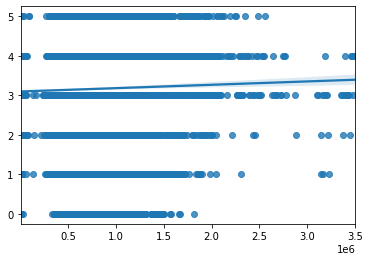

In [22]:
sns.regplot(x=[i for r in RT_ratings for i in r], y=[i for r in honesty_ratings for i in r])

In [106]:
with open('fr_'+batch+'_RT_honesty_rating.json', 'w') as f:
    json.dump(RT_hr, f)

In [108]:
with open('fr_'+batch+'_when_lied.json', 'w') as f:
    json.dump(when_lied, f)

In [23]:
colour_report = {}

for i, uuid in enumerate(uuids):
    colour_report[uuid] = reported_col[i]

In [24]:
colour_picked = {}

for i, uuid in enumerate(uuids):
    colour_picked[uuid] = rand_pick_col[i]

In [25]:
pp_lies = {}

for i, uuid in enumerate(uuids):
    pp_lies[uuid] = pp_lied[i]

In [26]:
win_lose_tie = {}

for i, uuid in enumerate(uuids):
    win_lose_tie[uuid] = trial_result[i]

In [27]:
other_reports = {}

for i, uuid in enumerate(uuids):
    other_reports[uuid] = other_outcome[i]

In [28]:
nreds = {}

for i, uuid in enumerate(uuids):
    nreds[uuid] = n_red[i]

In [115]:
with open('fr_'+batch+'_win_lose_tie.json', 'w') as f:
    json.dump(win_lose_tie, f)

In [116]:
with open('fr_'+batch+'_reported_col.json', 'w') as f:
    json.dump(colour_report, f)

In [117]:
with open('fr_'+batch+'_picked_col.json', 'w') as f:
    json.dump(colour_picked, f)

In [118]:
with open('fr_'+batch+'_pp_lies.json', 'w') as f:
    json.dump(pp_lies, f)

In [119]:
with open('fr_'+batch+'_other_reports.json', 'w') as f:
    json.dump(other_reports, f)

In [120]:
with open('fr_'+batch+'_n_red.json', 'w') as f:
    json.dump(nreds, f)

In [29]:
# lie proportion per user
lie_prop = {}
avg_honesty_rating = {}

for i, uuid in enumerate(uuids):
    i_lie_prop = sum([x != y for x, y in zip(rand_pick_col[i], reported_col[i])])/90
    i_avg_rating = sum(honesty_ratings[i])/len(honesty_ratings[i])
    print(i_lie_prop, i_avg_rating)
    lie_prop[uuid] = i_lie_prop
    avg_honesty_rating[uuid] = i_avg_rating

0.022222222222222223 3.2222222222222223
0.23333333333333334 3.7555555555555555
0.24444444444444444 3.2222222222222223
0.0 3.188888888888889
0.4111111111111111 3.4
0.6 2.4555555555555557
0.03333333333333333 3.6777777777777776
0.2222222222222222 2.922222222222222
0.13333333333333333 2.7888888888888888
0.25555555555555554 3.8555555555555556
0.022222222222222223 3.7111111111111112
0.6222222222222222 1.4555555555555555
0.6555555555555556 2.7
0.2111111111111111 3.466666666666667
0.2111111111111111 3.7555555555555555
0.14444444444444443 2.7333333333333334
0.011111111111111112 2.922222222222222
0.5111111111111111 3.433333333333333
0.1111111111111111 2.9555555555555557
0.14444444444444443 2.522222222222222
0.044444444444444446 3.2888888888888888
0.07777777777777778 3.022222222222222
0.25555555555555554 4.022222222222222
0.0 3.188888888888889
0.6333333333333333 1.7777777777777777
0.0 2.3555555555555556
0.5333333333333333 3.2
0.5888888888888889 3.2555555555555555
0.45555555555555555 2.26666666666

In [142]:
with open("./data/fr/fr100_mean_honesty_rating.json", "w", encoding="utf-8") as f:
    json.dump(avg_honesty_rating, f)

In [143]:
with open("./data/fr/fr100_lie_prop.json", "w", encoding="utf-8") as f:
    json.dump(lie_prop, f)

In [32]:
mean_hr = [avg_honesty_rating[key] for key in avg_honesty_rating.keys()]

<AxesSubplot:>

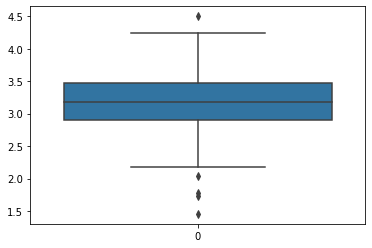

In [35]:
sns.boxplot(data=mean_hr)

In [36]:
# lie proportion BLOCK 1
lie_prop_b1 = []
avg_honesty_rating_b1 = []

for i in range(len(uuids)):
    i_lie_prop = sum([x != y for x, y in zip(rand_pick_col[i][:30], reported_col[i][:30])])/30
    i_avg_rating = sum(honesty_ratings[i][:30])/len(honesty_ratings[i][:30])
    print(i_lie_prop, i_avg_rating)
    
    lie_prop_b1.append(i_lie_prop)
    avg_honesty_rating_b1.append(i_avg_rating)

0.06666666666666667 3.1666666666666665
0.23333333333333334 3.8666666666666667
0.13333333333333333 3.1333333333333333
0.0 3.533333333333333
0.1 3.466666666666667
0.5 2.7666666666666666
0.03333333333333333 3.433333333333333
0.23333333333333334 3.2
0.26666666666666666 2.466666666666667
0.16666666666666666 4.233333333333333
0.03333333333333333 3.533333333333333
0.6666666666666666 1.4
0.7 3.4
0.1 4.4
0.36666666666666664 3.7666666666666666
0.2 2.566666666666667
0.03333333333333333 2.966666666666667
0.4666666666666667 2.8
0.06666666666666667 2.3666666666666667
0.16666666666666666 2.2666666666666666
0.13333333333333333 3.1
0.0 3.066666666666667
0.03333333333333333 3.966666666666667
0.0 3.533333333333333
0.6 1.7333333333333334
0.0 1.3
0.5666666666666667 2.8
0.6666666666666666 3.2333333333333334
0.13333333333333333 2.466666666666667
0.03333333333333333 3.1666666666666665
0.0 3.2333333333333334
0.0 2.566666666666667
0.03333333333333333 3.2666666666666666
0.0 2.8666666666666667
0.6 3.7333333333333

In [37]:
# lie proportion BLOCK 2
lie_prop_b2 = []
avg_honesty_rating_b2 = []

for i in range(len(uuids)):
    i_lie_prop = sum([x != y for x, y in zip(rand_pick_col[i][30:60], reported_col[i][30:60])])/30
    i_avg_rating = sum(honesty_ratings[i][30:60])/len(honesty_ratings[i][30:60])
    print(i_lie_prop, i_avg_rating)
    
    lie_prop_b2.append(i_lie_prop)
    avg_honesty_rating_b2.append(i_avg_rating)

0.0 3.033333333333333
0.3 3.5
0.3333333333333333 2.7666666666666666
0.0 3.0
0.5333333333333333 3.3333333333333335
0.7333333333333333 1.9666666666666666
0.06666666666666667 3.9
0.3333333333333333 2.6666666666666665
0.1 2.533333333333333
0.26666666666666666 3.9
0.0 3.7333333333333334
0.5666666666666667 1.3333333333333333
0.6 2.2
0.3333333333333333 1.9
0.0 4.0
0.1 2.8333333333333335
0.0 2.7666666666666666
0.5333333333333333 3.566666666666667
0.1 3.066666666666667
0.1 3.033333333333333
0.0 3.3666666666666667
0.0 2.8666666666666667
0.43333333333333335 4.033333333333333
0.0 3.1666666666666665
0.7333333333333333 1.9
0.0 2.9
0.4666666666666667 3.2
0.5333333333333333 3.3
0.6 2.3333333333333335
0.13333333333333333 3.0
0.0 3.033333333333333
0.0 3.0
0.0 3.1
0.0 3.033333333333333
0.1 1.5
0.0 3.1
0.23333333333333334 2.966666666666667
0.0 3.7
0.0 2.8
0.43333333333333335 3.2
0.36666666666666664 3.3333333333333335
0.3 2.7666666666666666
0.0 3.466666666666667
0.0 3.3666666666666667
0.36666666666666664 3

In [38]:
# lie proportion BLOCK 3
lie_prop_b3 = []
avg_honesty_rating_b3 = []

for i in range(len(uuids)):
    i_lie_prop = sum([x != y for x, y in zip(rand_pick_col[i][60:], reported_col[i][60:])])/30
    i_avg_rating = sum(honesty_ratings[i][60:])/len(honesty_ratings[i][60:])
    print(i_lie_prop, i_avg_rating)
    
    lie_prop_b3.append(i_lie_prop)
    avg_honesty_rating_b3.append(i_avg_rating)

0.0 3.466666666666667
0.16666666666666666 3.9
0.26666666666666666 3.7666666666666666
0.0 3.033333333333333
0.6 3.4
0.5666666666666667 2.6333333333333333
0.0 3.7
0.1 2.9
0.03333333333333333 3.3666666666666667
0.3333333333333333 3.433333333333333
0.03333333333333333 3.8666666666666667
0.6333333333333333 1.6333333333333333
0.6666666666666666 2.5
0.2 4.1
0.26666666666666666 3.5
0.13333333333333333 2.8
0.0 3.033333333333333
0.5333333333333333 3.933333333333333
0.16666666666666666 3.433333333333333
0.16666666666666666 2.2666666666666666
0.0 3.4
0.23333333333333334 3.1333333333333333
0.3 4.066666666666666
0.0 2.8666666666666667
0.5666666666666667 1.7
0.0 2.8666666666666667
0.5666666666666667 3.6
0.5666666666666667 3.2333333333333334
0.6333333333333333 2.0
0.03333333333333333 3.7
0.0 2.6
0.1 3.2
0.0 3.4
0.0 3.3
0.06666666666666667 3.8666666666666667
0.0 3.0
0.36666666666666664 3.1
0.0 3.8
0.06666666666666667 2.533333333333333
0.4666666666666667 3.2333333333333334
0.3333333333333333 4.4
0.43333

In [110]:
exclude = [
    "60f44f7a57468d4e9f87fa5b",
"6154284fc5154abb9a264b0c",
"6160403f5164508979e6358d",
"615d9f86fdd5e127d783e850",
"612812ff639db35356dff7c5",
"5962eb69241f8d0001064bd3",
"61617a80475c4e619cbed83e",
"616deadcefd7197b84ab677c",
"616f43682df7bc3f99f95411",
"6162a881b823e80dfcf94792",
"616f6a2135e569c0b4861b01",
"5cb08ecee11a890001a478ad",
"5b2caaa75b5c0900018b4724",
"61702b890e755075af3a5423",
"616ec0185d61b5fa0b62b42a"
]

In [121]:
len(exclude)

15

In [117]:
clean_mean_hr = [avg_honesty_rating[key] for key in avg_honesty_rating.keys() if key not in exclude]

In [119]:
clean_lie_prop = [lie_prop[key] for key in avg_honesty_rating.keys() if key not in exclude]

In [120]:
pearsonr(clean_lie_prop, clean_mean_hr)

(-0.17317050715291835, 0.11298598594088721)

<AxesSubplot:>

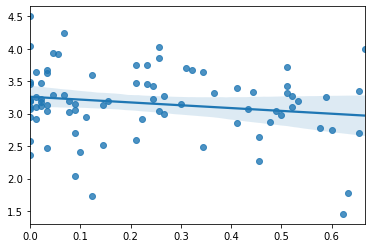

In [122]:
sns.regplot(x=clean_lie_prop, y=clean_mean_hr)

In [39]:
from scipy.stats import spearmanr, pearsonr

In [40]:
spearmanr(lie_prop_b1, avg_honesty_rating_b1)

SpearmanrResult(correlation=-0.2348961196434084, pvalue=0.018650463874181056)

In [41]:
spearmanr(lie_prop_b2, avg_honesty_rating_b2)

SpearmanrResult(correlation=-0.1553097421494447, pvalue=0.12284299393767019)

In [42]:
spearmanr(lie_prop_b3, avg_honesty_rating_b3)

SpearmanrResult(correlation=-0.20840370679259065, pvalue=0.03745765930122504)

In [45]:
lie_props = [lie_prop[key] for key in lie_prop.keys()]

In [46]:
spearmanr(lie_props, mean_hr)

SpearmanrResult(correlation=-0.17525911541548164, pvalue=0.08114466686894888)

In [47]:
pearsonr(lie_props, mean_hr)

(-0.21995365189362337, 0.027886013724525455)

[Text(0.5, 0, 'lie proportion'), Text(0, 0.5, 'mean honesty rating')]

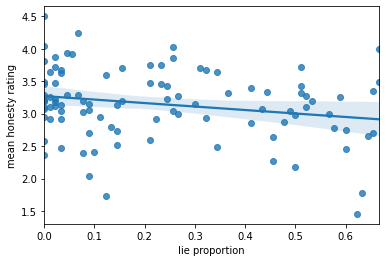

In [54]:
p = sns.regplot(x=lie_props, y=mean_hr)
p.set(xlabel="lie proportion", ylabel="mean honesty rating")

In [48]:
norm_honesty_ratings = []

for ratings in honesty_ratings:
    normed = [v/5 for v in ratings]
    norm_honesty_ratings.append(normed)

In [50]:
import numexpr

norm_suspicion_ratings = numexpr.evaluate('(1 - norm_honesty_ratings)')

In [51]:
norm_suspicion_ratings

array([[0.4, 0.4, 0.4, ..., 0. , 0.2, 0.2],
       [0. , 0. , 0.2, ..., 0.2, 0.2, 0.2],
       [0.2, 0.8, 0.8, ..., 0.2, 0.6, 0.4],
       ...,
       [0.4, 0.6, 0.6, ..., 0.2, 0.4, 0.4],
       [0.4, 0.6, 0.6, ..., 0.2, 0.4, 0.2],
       [0.6, 0.8, 0.8, ..., 0.8, 0. , 0. ]])

In [258]:
tmp = {uuids[i]: ratings for i, ratings in enumerate(norm_suspicion_ratings)}

In [129]:
# pd.DataFrame(tmp).to_json('fr_'+batch+'_normalized_suspicion_ratings.json')

In [ ]:
for i in range(len(uuids)):
    p=sns.lineplot(x=norm_suspicion_ratings[i], y=RT_ratings[i])
    p.set(xlabel="normalized suspicion rating", ylabel="RT honesty rating")

In [ ]:
diff_s_ev_alpha = [
    0.74,
0.3,
0,
0.33,
0.05,
0.3,
0.34,
0.36,
0.6,
0.67]

diff_s_ev_prior = [
    0,
0.11,
0.48,
0.18,
0.42,
0.05,
0.25,
0,
0,
0]

In [100]:
# inspect block order effects

def mean(x):
    return sum(x)/len(x)

In [ ]:
from statistics import median

In [ ]:
s_ev_alpha_hmedian = [1 if v > median(diff_s_ev_alpha) else 0 for v in diff_s_ev_alpha]

In [ ]:
s_ev_prior_hmedian = [1 if v > median(diff_s_ev_prior) else 0 for v in diff_s_ev_prior]

In [52]:
mean_hrs = []

for ratings in norm_suspicion_ratings:
    mean_hrs.append(sum(ratings)/len(ratings))

In [ ]:
tmp = pd.DataFrame({"higher_than_median": s_ev_alpha_hmedian, 
                    "mean_normed_suspicion_rating": mean_hrs,
                    "lied_more": [v > median(lie_prop) for v in lie_prop],
                    "diff_s_ev_alpha": diff_s_ev_alpha, "diff_s_ev_prior": diff_s_ev_prior, "s_ev_prior_hmedian": s_ev_prior_hmedian, "lie_prop": lie_prop})

In [ ]:
tmp = [v > median(lie_prop) for v in lie_prop]
p = sns.barplot(x=tmp, y=mean_hrs)
p.set(xlabel="lied more than median lie proportion", ylabel="mean suspicion")
# p.set_title("SAME condition: liars and mean suspicion")

In [ ]:
p = sns.barplot(data=tmp, y="lie_prop", x="higher_than_median")
p.set(xlabel="alpha higher than median (1) or not (0)", ylabel="lie proportion")
p.set_title("DIFF condition signed EV model w/o update rule: high vs low alpha and lie proportion")

In [ ]:
p = sns.barplot(data=tmp, y="lie_prop", x="s_ev_prior_hmedian")
p.set(xlabel="baseline suspicion (prior) higher than median (1) or not (0)", ylabel="lie proportion")
p.set_title("DIFF condition signed EV model w/o update rule: high vs low prior and lying")

[Text(0.5, 0, 'lie proportion'), Text(0, 0.5, 'mean honesty rating')]

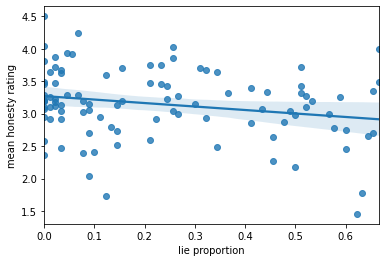

In [63]:
tmp = pd.DataFrame({'lie_prop': lie_props, 'avg_hr': mean_hr})

p = sns.regplot(data=tmp, x='lie_prop', y='avg_hr')
p.set(xlabel="lie proportion", ylabel="mean honesty rating")
# p.set_title("DIFF condition")

In [55]:
avg_nolie_block_ratings = []
avg_lie33_block_ratings = []
avg_lie50_block_ratings = []

sd_nolie_block_ratings = []
sd_lie33_block_ratings = []
sd_lie50_block_ratings = []

for i, uuid in enumerate(uuids):
    avg_honesty_rating[uuid]
    
    if condition[uuid] == "11":
        nolie = tmp[uuid][:30]
        avg_nolie_block_ratings.append(mean(nolie))
        sd_nolie_block_ratings.append(np.std(nolie))
#         print(i, "mean honesty rating", mean(nolie))
#         print(i, "SD honesty rating", np.std(nolie))
        
        lie33 = tmp[uuid][30:60]
        avg_lie33_block_ratings.append(mean(lie33))
        sd_lie33_block_ratings.append(np.std(lie33))
        
        lie50 = tmp[uuid][60:]
        avg_lie50_block_ratings.append(mean(lie50))
        sd_lie50_block_ratings.append(np.std(lie50))
        
    if condition[uuid] == "12":
        nolie = tmp[uuid][:30]
        avg_nolie_block_ratings.append(mean(nolie))
        sd_nolie_block_ratings.append(np.std(nolie))
#         print(i, "mean honesty rating", mean(nolie))
#         print(i, "SD honesty rating", np.std(nolie))
        
        lie33 = tmp[uuid][60:]
        avg_lie33_block_ratings.append(mean(lie33))
        sd_lie33_block_ratings.append(np.std(lie33))
        
        lie50 = tmp[uuid][30:60]
        avg_lie50_block_ratings.append(mean(lie50))
        sd_lie50_block_ratings.append(np.std(lie50))
        
    if condition[uuid] == "21":
        nolie = tmp[uuid][30:60]
        avg_nolie_block_ratings.append(mean(nolie))
        sd_nolie_block_ratings.append(np.std(nolie))
#         print(i, "mean honesty rating", mean(nolie))
#         print(i, "SD honesty rating", np.std(nolie))
        
        lie33 = tmp[uuid][:30]
        avg_lie33_block_ratings.append(mean(lie33))
        sd_lie33_block_ratings.append(np.std(lie33))
        
        lie50 = tmp[uuid][60:]
        avg_lie50_block_ratings.append(mean(lie50))
        sd_lie50_block_ratings.append(np.std(lie50))
        
    if condition[uuid] == "22":
        nolie = tmp[uuid][60:]
        avg_nolie_block_ratings.append(mean(nolie))
        sd_nolie_block_ratings.append(np.std(nolie))
#         print(i, "mean honesty rating", mean(nolie))
#         print(i, "SD honesty rating", np.std(nolie))
        
        lie33 = tmp[uuid][:30]
        avg_lie33_block_ratings.append(mean(lie33))
        sd_lie33_block_ratings.append(np.std(lie33))
        
        lie50 = tmp[uuid][30:60]
        avg_lie50_block_ratings.append(mean(lie50))
        sd_lie50_block_ratings.append(np.std(lie50))
        
    if condition[uuid] == "31":
        nolie = tmp[uuid][30:60]
        avg_nolie_block_ratings.append(mean(nolie))
        sd_nolie_block_ratings.append(np.std(nolie))
#         print(i, "mean honesty rating", mean(nolie))
#         print(i, "SD honesty rating", np.std(nolie))
        
        lie33 = tmp[uuid][60:]
        avg_lie33_block_ratings.append(mean(lie33))
        sd_lie33_block_ratings.append(np.std(lie33))
        
        lie50 = tmp[uuid][:30]
        avg_lie50_block_ratings.append(mean(lie50))
        sd_lie50_block_ratings.append(np.std(lie50))
    if condition[uuid] == "32":
        nolie = tmp[uuid][60:]
        avg_nolie_block_ratings.append(mean(nolie))
        sd_nolie_block_ratings.append(np.std(nolie))
#         print(i, "mean honesty rating", mean(nolie))
#         print(i, "SD honesty rating", np.std(nolie))
                
        lie33 = tmp[uuid][30:60]
        avg_lie33_block_ratings.append(mean(lie33))
        sd_lie33_block_ratings.append(np.std(lie33))
        
        lie50 = tmp[uuid][:30]
        avg_lie50_block_ratings.append(mean(lie50))
        sd_lie50_block_ratings.append(np.std(lie50))
    else:
        pass

In [56]:
block_lieorder_avg_ratings = list(zip(avg_nolie_block_ratings, avg_lie33_block_ratings, avg_lie50_block_ratings))

In [57]:
block_lieorder_sd_ratings = list(zip(sd_nolie_block_ratings, sd_lie33_block_ratings, sd_lie50_block_ratings))

In [58]:
from scipy.stats import chisquare

In [59]:
chisquare(avg_nolie_block_ratings)

C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\scipy\stats\stats.py:5975: RuntimeWarning: Mean of empty slice.
  f_exp = f_obs.mean(axis=axis, keepdims=True)


Power_divergenceResult(statistic=0.0, pvalue=nan)

In [60]:
chisquare(avg_lie33_block_ratings)

Power_divergenceResult(statistic=0.0, pvalue=nan)

In [61]:
chisquare(avg_lie50_block_ratings)

Power_divergenceResult(statistic=0.0, pvalue=nan)

In [62]:
avg_nolie_block_ratings

[]

In [ ]:
#     i_report_honesty = np.array([transdict[x] for x in block1_resp.randomPickColour]) != block1_resp.reportColour
#     i_report_honesty.extend(np.array([transdict[x] for x in block2_resp.randomPickColour]) != block2_resp.reportColour)
#     i_report_honesty.extend(np.array([transdict[x] for x in block3_resp.randomPickColour]) != block3_resp.reportColour)
#     if_lied.append(i_report_honesty)

### inspect demographics data

In [66]:
# demographics survey query reference
refs_demographics = []
for uuid in uuids:
    refs_demographics.append(subjects_ref.document(uuid).collection(u'responses').document('demographics').get())

In [67]:
edlev = {}

for i, feedback in enumerate(refs_demographics):
    if feedback.to_dict() is None:
        continue
    print(i, feedback.to_dict()['edlev'])
    edlev[uuids[i]] = int(feedback.to_dict()['edlev'])

0 3
1 6
2 5
3 3
4 3
5 5
6 3
7 9
8 5
9 2
10 3
11 5
12 6
13 8
14 1
15 3
16 5
17 3
18 5
19 2
20 3
21 2
22 3
23 3
24 6
25 2
26 3
27 6
28 6
29 5
30 6
31 6
32 2
33 9
34 9
35 5
36 3
37 5
38 6
39 3
40 6
41 5
42 3
43 6
44 5
45 2
46 3
47 3
48 3
49 2
50 3
51 5
52 2
53 1
54 2
55 3
56 5
57 5
58 5
59 5
60 5
61 6
62 5
63 5
64 5
65 5
66 2
67 5
68 6
69 5
70 3
71 5
72 5
73 3
74 2
75 5
76 6
77 2
78 3
79 5
80 5
81 5
82 2
83 5
84 6
85 4
86 3
87 6
88 3
89 5
90 5
91 2
92 5
93 4
94 6
95 3
96 5
97 6
98 2
99 6


In [68]:
age = {}

for i, feedback in enumerate(refs_demographics):
    if feedback.to_dict() is None:
        continue
    print(i, feedback.to_dict()['age'])
    age[uuids[i]]=int(feedback.to_dict()['age'])

0 22
1 25
2 28
3 24
4 28
5 20
6 23
7 31
8 28
9 23
10 19
11 38
12 41
13 23
14 38
15 32
16 32
17 19
18 22
19 19
20 21
21 35
22 40
23 33
24 25
25 19
26 30
27 49
28 32
29 31
30 27
31 29
32 64
33 23
34 30
35 21
36 32
37 22
38 32
39 24
40 44
41 24
42 19
43 33
44 29
45 21
46 24
47 51
48 30
49 34
50 36
51 23
52 19
53 57
54 19
55 31
56 32
57 41
58 33
59 18
60 49
61 49
62 34
63 32
64 65
65 49
66 19
67 26
68 32
69 30
70 18
71 51
72 28
73 19
74 20
75 23
76 56
77 37
78 20
79 23
80 40
81 24
82 23
83 35
84 28
85 29
86 42
87 25
88 20
89 25
90 33
91 23
92 47
93 37
94 35
95 55
96 49
97 58
98 19
99 28


In [69]:
gender = {}

for i, feedback in enumerate(refs_demographics):
    print(i, feedback.to_dict()['gender'])
    gender[uuids[i]] = feedback.to_dict()['gender']

0 female
1 male
2 male
3 male
4 female
5 female
6 female
7 male
8 male
9 male
10 male
11 male
12 male
13 female
14 female
15 female
16 female
17 male
18 male
19 male
20 female
21 female
22 female
23 male
24 male
25 female
26 male
27 female
28 male
29 female
30 female
31 male
32 female
33 female
34 male
35 male
36 male
37 female
38 male
39 male
40 female
41 female
42 female
43 female
44 female
45 female
46 female
47 female
48 male
49 female
50 female
51 female
52 female
53 female
54 male
55 female
56 female
57 female
58 female
59 female
60 male
61 male
62 female
63 male
64 female
65 male
66 male
67 female
68 female
69 female
70 female
71 female
72 female
73 female
74 female
75 female
76 female
77 male
78 female
79 male
80 male
81 male
82 female
83 female
84 male
85 female
86 female
87 female
88 female
89 male
90 female
91 male
92 female
93 female
94 female
95 female
96 male
97 female
98 male
99 male


In [70]:
with open("fr100_age.json", "w", encoding="utf-8") as f:
    json.dump(age, f)

In [71]:
with open("fr100_gender.json", "w", encoding="utf-8") as f:
    json.dump(gender, f)

In [72]:
with open("fr100_edlev.json", "w", encoding="utf-8") as f:
    json.dump(edlev, f)

### inspect EQ scores

In [381]:
# EQ survey query reference
refs_eq = []

for uuid in uuids:
    refs_eq.append(subjects_ref.document(uuid).collection(u'responses').document('EQ').get())

In [382]:
len(refs_eq)

100

In [383]:
eq_items_r = [
    "I find it hard to know what to do in a social situation",
    "I often find it difficult to judge if something is rude or polite",
    "In a conversation I tend to focus on my own thoughts rather than on what my listener might be thinking",
    "It is hard for me to see why some things upset people so much", 
    "I can’t always see why someone should have felt offended by a remark",
    "Other people often say that I am insensitive though I don’t always see why"
]

eq_items = ["I can easily tell if someone else wants to enter a conversation",
            "I really enjoy caring for other people",
            "I can pick up quickly if someone says one thing but means another",
            "I find it easy to put myself in somebody else’s shoes",
            "I am good at predicting how someone will feel",
            "I am quick to spot when someone in a group is feeling awkward or uncomfortable",
            "I don’t tend to find social situations confusing",
            "Other people tell me I am good at understanding how they are feeling and what they are thinking",
            "I can easily tell if someone else is interested or bored with what I am saying",
            "Friends usually talk to me about their problems as they say that I am very understanding",
            "I can sense if I am intruding even if the other person doesn’t tell me",
            "I can tune into how someone else feels rapidly and intuitively",
            "I can easily work out what another person might want to talk about",
            "I can tell if someone is masking their true emotion",
            "I am good at predicting what someone will do",
            "I tend to get emotionally involved with a friend’s problem"
           ]

eq_catch = [
#     "Please select the middle answer option",
    "Please select the first answer option",
    "Please select the last answer option"
]

In [384]:
eq_responses = {}

for i, resp in enumerate(refs_eq):
    i_eq = []
    if resp.to_dict() is None:
        continue
    for it in eq_items:
        i_eq.append(resp.to_dict()[it])
    for jt in eq_items_r:
        ar = resp.to_dict()[jt]
        ar = numexpr.evaluate(f'(7 - ar)')
        i_eq.append(ar.item())
    eq_responses[uuids[i]] = i_eq

In [385]:
with open("fr100_eq.json", "w", encoding="utf-8") as f:
    json.dump(eq_responses, f)

In [386]:
eq_catch_resp = {}

for i, resp in enumerate(refs_eq):
    if resp.to_dict() is None:
        continue
    i_eq = []
    for it in eq_catch:
        i_eq.append(resp.to_dict()[it])
    eq_catch_resp[uuids[i]] = i_eq

In [387]:
# check if people succeeded at all catch questions

eq_catch_resp

{'6110e7ae08023ecb9207b05e': [1, 7],
 '5fec7577ad8fbadf15cd5607': [1, 7],
 '615f1500b60d25e2660e8644': [1, 7],
 '615ec4f34cb81d7e58fa144c': [1, 7],
 '5cd5fe480f0de600018e7251': [1, 7],
 '60f44f7a57468d4e9f87fa5b': [2, 6],
 '6160011304f5319ece189bfa': [1, 7],
 '5af196e1e1b5b8000148ac76': [1, 7],
 '6154284fc5154abb9a264b0c': [1, 7],
 '6147d726fa94eb7d5c2de156': [1, 7],
 '6160403f5164508979e6358d': [1, 7],
 '56210effed6e5a000ac7f3a5': [1, 7],
 '6156ee007bdef87eb5b4aeb0': [1, 7],
 '61085b8ec672d0e88151d5ae': [1, 7],
 '57313ba2070de6000f43384e': [1, 7],
 '615d9f86fdd5e127d783e850': [1, 7],
 '614f23537aab4e64abfd53ae': [1, 7],
 '61533356ce435e5a4a4addd0': [1, 7],
 '6152218517a89c5b41e18a06': [1, 7],
 '615f0726cbd12330a2d82556': [1, 7],
 '6169c2dc0d5361fbf96713f4': [1, 7],
 '5d8a1081323cf30001205f53': [1, 7],
 '5a455b091950a80001e7c49a': [1, 7],
 '5afc4671bb36f900018ef1fe': [1, 7],
 '6169a6bf5372000629b20879': [1, 7],
 '616d3d7cbf9e78d1a6e3219e': [1, 7],
 '61667ad3d3c29f487b65cd45': [1, 7],
 

In [388]:
eq_score = {}

for uuid in uuids:
    resp = eq_responses[uuid]
    eq_score[uuid] = sum(resp)/len(resp)

In [389]:
with open("./data/fr/fr100_eq_score.json", "w", encoding="utf-8") as f:
    json.dump(eq_score, f)

In [392]:
len(eq_score)

100

In [393]:
eq_score.keys()

dict_keys(['6110e7ae08023ecb9207b05e', '5fec7577ad8fbadf15cd5607', '615f1500b60d25e2660e8644', '615ec4f34cb81d7e58fa144c', '5cd5fe480f0de600018e7251', '60f44f7a57468d4e9f87fa5b', '6160011304f5319ece189bfa', '5af196e1e1b5b8000148ac76', '6154284fc5154abb9a264b0c', '6147d726fa94eb7d5c2de156', '6160403f5164508979e6358d', '56210effed6e5a000ac7f3a5', '6156ee007bdef87eb5b4aeb0', '61085b8ec672d0e88151d5ae', '57313ba2070de6000f43384e', '615d9f86fdd5e127d783e850', '614f23537aab4e64abfd53ae', '61533356ce435e5a4a4addd0', '6152218517a89c5b41e18a06', '615f0726cbd12330a2d82556', '6169c2dc0d5361fbf96713f4', '5d8a1081323cf30001205f53', '5a455b091950a80001e7c49a', '5afc4671bb36f900018ef1fe', '6169a6bf5372000629b20879', '616d3d7cbf9e78d1a6e3219e', '61667ad3d3c29f487b65cd45', '614cd4d65c8c90077afbe40f', '616ae1d6b676edf5f6ae8351', '5f96efef011b8c01fd34a9eb', '616d2d6c9c76109cd9aa68e7', '612812ff639db35356dff7c5', '616b075e487d1ad05543166e', '613bea209464d339e18036d4', '616d50ac138442ad3ad08b0e', '614f0cfd

### process RT honesty ratings

In [180]:
[RT_hr[rt] for rt in RT_hr if rt not in batch1]

[[400706,
  413277,
  425928,
  438178,
  449477,
  461018,
  474088,
  486222,
  498794,
  510256,
  530788,
  540737,
  552898,
  565803,
  576218,
  586568,
  598811,
  610223,
  621148,
  639568,
  653875,
  665871,
  678955,
  690762,
  701212,
  712838,
  723900,
  736709,
  753917,
  766059,
  780486,
  791611,
  802375,
  816215,
  826252,
  837565,
  849021,
  862342,
  872648,
  883235,
  900786,
  915693,
  926989,
  940067,
  953117,
  962675,
  973761,
  986193,
  998346,
  1012617,
  1021631,
  1033093,
  1044231,
  1054035,
  1063828,
  1079107,
  1090287,
  1102566,
  1119844,
  1130129,
  1144604,
  1154662,
  1166677,
  1176427,
  1189583,
  1201624,
  1211837,
  1223270,
  1233916,
  1243779,
  1259510,
  1270604,
  1280078,
  1290236,
  1302513,
  1313797,
  1323046,
  1332322,
  1343914,
  1358926,
  1368280,
  1378541,
  1391726,
  1409577,
  1420005,
  1432500,
  1444126,
  1454274,
  1468664,
  1479321],
 [533788,
  543300,
  552844,
  563484,
  573997,
  583307

In [176]:
trials_finish_time = {}

for i, uuid in enumerate(uuids):
    if uuid in batch1:
        continue
    trials_finish_time[uuid] = refs_trials[i].to_dict()['finishTime']

In [181]:
for uuid in trials_finish_time:
    RT_hr[uuid].insert(0, trials_finish_time[uuid])

In [179]:
trials_finish_time

{'6151e17dd596caee8fc6b73c': 379324.7999999523,
 '5efd22056ec55516587f32a6': 522501.59999996424,
 '615630fc8d505b023ba5de4f': 378987,
 '5f24794d55695f0549163e86': 293584.90000000596,
 '6168983cf2f14b393f06c50a': 240981.79999995232,
 '616d53892b58b6e0388ab050': 253487,
 '5e6d395882be80000cec9f92': 372210.69999999553,
 '616deadcefd7197b84ab677c': 221818.5,
 '616f43682df7bc3f99f95411': 493107.09999999404,
 '614f40be2fd4052c9f0990fe': 547267.3000000007,
 '616c96b3a5db6313464f8d8d': 387395.10000002384,
 '6162a881b823e80dfcf94792': 623712.200000003,
 '605116da9a3b2d13a44665a0': 246652.00000000003,
 '6166d329ed4a00458e660e87': 648334.0999999046,
 '616f6a2135e569c0b4861b01': 690613.5,
 '616b05332ad106da01d79fa8': 229427.3999999985,
 '6169d947c10b18bb9541b6d9': 303233.799999997,
 '5cfb74958f650700151c7df3': 354058.3000000119,
 '6169254bcae807672de29c2d': 509213.3000000119,
 '6110aac49542b99f9bd6c09b': 613485,
 '5b98d9362cca9c0001de161f': 393257.39999961853,
 '6123d102b713b8a947fd2eb2': 386865,


In [177]:
len(trials_finish_time)

60

In [240]:
RT_hrs = {}

for uuid in uuids:
    if uuid in batch1:
        continue
    ts_hr = RT_hr[uuid]
    ts_rep = ts_report[uuid]
    assert(len(ts_hr) == len(ts_rep))
    
    RT_hrs[uuid] = [a-b for a, b in zip(ts_hr, ts_rep)]

In [243]:
df_RT_hr = pd.DataFrame(RT_hrs).applymap(lambda x: x-2000)

In [244]:
batch1_hr_RTs = pd.DataFrame({rt: RT_hr[rt] for rt in RT_hr if rt in batch1})

In [246]:
df_RT_hrs = batch1_hr_RTs.join(df_RT_hr)

In [247]:
df_RT_hrs.to_feather("./data/fr/fr100_RT_honestyratings_ms.feather")

In [248]:
df_RT_hrs.mean()

6110e7ae08023ecb9207b05e    2830.922222
5fec7577ad8fbadf15cd5607    3387.922222
615f1500b60d25e2660e8644    2452.255556
615ec4f34cb81d7e58fa144c    2177.355556
5cd5fe480f0de600018e7251    1849.177778
                               ...     
61486876563fb6bdeb777a10    3587.055556
5ebaec011a7d64080694fe74    3020.844444
616ec0185d61b5fa0b62b42a    4296.511111
616f35805cb9047a629edb71    3851.611111
61572268fe13d0e23bdc2036    3709.366667
Length: 100, dtype: float64

In [260]:
dfs = []

for uuid in uuids:
    df = pd.DataFrame({
        'PID': uuid,
        'n_red': nreds[uuid],
        'outcome': other_reports[uuid],
        'col_reported': colour_report[uuid],
        'col_picked': colour_picked[uuid],
        'pp_lied': pp_lies[uuid],
        'RT_rating': df_RT_hrs[uuid],
        'win_lose_tie': win_lose_tie[uuid],
        'suspicion_rating': tmp[uuid]
    })
    dfs.append(df)
#     df.to_feather("./data/fr/fr100_"+uuid+".feather")

In [262]:
dfs_long = pd.concat(dfs)

Text(0, 0.5, 'RT rating')

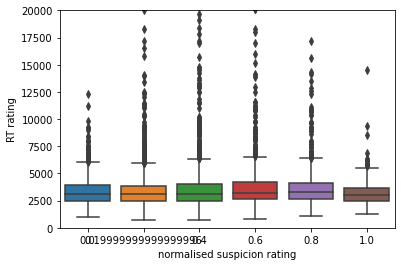

In [270]:
p = sns.boxplot(data=dfs_long, x='suspicion_rating', y='RT_rating')
p.set(ylim=(0,20000))
p.set_xlabel("normalised suspicion rating")
p.set_ylabel("RT rating")

Text(0, 0.5, 'RT rating')

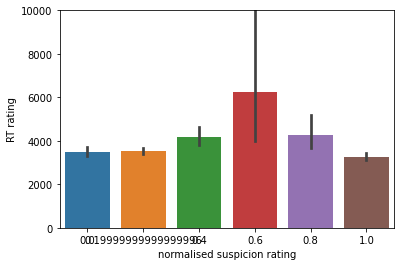

In [273]:
p = sns.barplot(data=dfs_long, x='suspicion_rating', y='RT_rating')
p.set(ylim=(0,10000))
p.set_xlabel("normalised suspicion rating")
p.set_ylabel("RT rating")

In [275]:
exclude = [
    "60f44f7a57468d4e9f87fa5b",
"6154284fc5154abb9a264b0c",
"6160403f5164508979e6358d",
"615d9f86fdd5e127d783e850",
"612812ff639db35356dff7c5",
"5962eb69241f8d0001064bd3",
"61617a80475c4e619cbed83e",
"616deadcefd7197b84ab677c",
"616f43682df7bc3f99f95411",
"6162a881b823e80dfcf94792",
"616f6a2135e569c0b4861b01",
"5cb08ecee11a890001a478ad",
"5b2caaa75b5c0900018b4724",
"61702b890e755075af3a5423",
"616ec0185d61b5fa0b62b42a"
]

In [319]:
dfs_long_clean = dfs_long[~dfs_long['PID'].isin(exclude)]

Text(0, 0.5, 'RT rating')

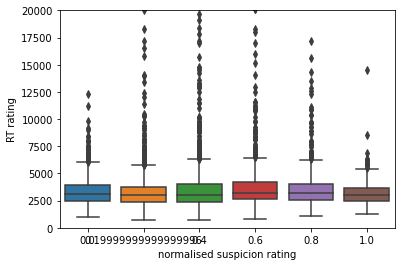

In [280]:
p = sns.boxplot(data=tmp, x='suspicion_rating', y='RT_rating')
p.set(ylim=(0,20000))
p.set_xlabel("normalised suspicion rating")
p.set_ylabel("RT rating")

Text(0, 0.5, 'RT rating')

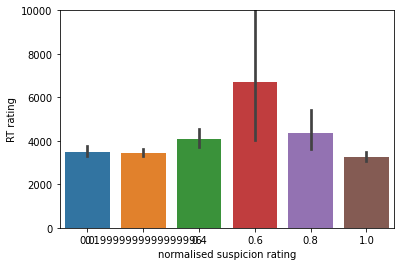

In [279]:
p = sns.barplot(data=tmp, x='suspicion_rating', y='RT_rating')
p.set(ylim=(0,10000))
p.set_xlabel("normalised suspicion rating")
p.set_ylabel("RT rating")

In [284]:
dfs_long['lied'] = dfs_long['col_picked'] != dfs_long['col_reported']

In [289]:
dfs_long.groupby('n_red')['lied'].mean()

n_red
1    0.085763
2    0.156835
3    0.181250
4    0.234703
5    0.273140
6    0.325373
Name: lied, dtype: float64

In [320]:
dfs_long_clean.groupby('n_red')['lied'].mean()

n_red
1    0.065979
2    0.149153
3    0.174927
4    0.229759
5    0.266738
6    0.328543
Name: lied, dtype: float64

In [301]:
dfs_long.groupby('n_red')['lied'].sum()

n_red
1    100
2    218
3    145
4    257
5    602
6    763
Name: lied, dtype: int64

In [303]:
from statistics import Counter

Counter(dfs_long['n_red'])

Counter({6: 2345, 4: 1095, 1: 1166, 2: 1390, 5: 2204, 3: 800})

In [311]:
tmp = dfs_long.groupby(['PID', 'n_red'])['lied'].mean()

In [315]:
tmp.to_json("tmp_lie_proportion_by_nreds.json")

In [336]:
ntmp = dict(tmp)

In [349]:
ttmp = pd.DataFrame(list(zip([d[0] for d in ntmp], [d[1] for d in ntmp], list(tmp))))

In [350]:
ttmp.columns = ['PID', 'n_red', 'lie_prop']

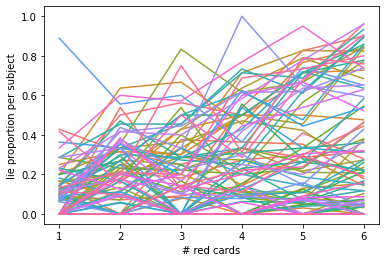

In [356]:
p = sns.lineplot(data=ttmp, hue='PID', x='n_red', y='lie_prop')
p.set_xlabel("# red cards")
p.set_ylabel("lie proportion per subject")

p.legend_.remove()

In [357]:
tmp = dfs_long_clean.groupby(['PID', 'n_red'])['lied'].mean()

In [358]:
tmp.to_json("./data/fr/fr100_lie_proportion_by_nreds_cleaned.json")

In [359]:
ntmp = dict(tmp)

In [360]:
ttmp = pd.DataFrame(list(zip([d[0] for d in ntmp], [d[1] for d in ntmp], list(tmp))))

In [361]:
ttmp.columns = ['PID', 'n_red', 'lie_prop']

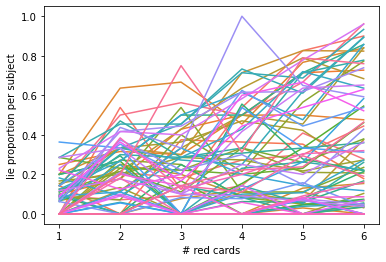

In [362]:
p = sns.lineplot(data=ttmp, hue='PID', x='n_red', y='lie_prop')
p.set_xlabel("# red cards")
p.set_ylabel("lie proportion per subject")

p.legend_.remove()

## Autism (AQ) scores

In [78]:
with open("../cards-deception/cards-game/src/assets/AQ.json", "r", encoding="utf-8") as f:
    aq_items = json.load(f)

In [79]:
for a in aq_items:
    print(a['item'])

I often notice small sounds when others do not.
I usually concentrate more on the whole picture, rather than the small details.
I find it easy to do more than one thing at once.
Please select the first answer option.
If there is an interruption, I can switch back to what I was doing very quickly.
I find it easy to ‘read between the lines’ when someone is talking to me.
I know how to tell if someone listening to me is getting bored.
When I’m reading a story I find it difficult to work out the characters’ intentions.
I like to collect information about categories of things (e.g., types of car, types of bird, types of train, types of plant, etc).
I find it easy to work out what someone is thinking or feeling just by looking at their face.
I find it difficult to work out people’s intentions.


In [134]:
catch = ["Please select the first answer option."]

aq_items = [
    "I often notice small sounds when others do not.",
"When I’m reading a story I find it difficult to work out the characters’ intentions.",
"I like to collect information about categories of things (e.g., types of car, types of bird, types of train, types of plant, etc).",
"I find it difficult to work out people’s intentions."
]

aq_items_r = [
    "I usually concentrate more on the whole picture, rather than the small details.",
"I find it easy to do more than one thing at once.",
    "I find it easy to work out what someone is thinking or feeling just by looking at their face.",
"If there is an interruption, I can switch back to what I was doing very quickly.",
"I find it easy to ‘read between the lines’ when someone is talking to me.",
"I know how to tell if someone listening to me is getting bored."
]

In [135]:
refs_aq = []

for uuid in uuids:
    refs_aq.append(subjects_ref.document(uuid).collection(u'responses').document('AQ').get())

In [136]:
aq_responses = {}
aq_catch = {}

for i, resp in enumerate(refs_aq):
    i_aq = []
    if resp.to_dict() is None:
        continue
    for it in aq_items:
        i_aq.append(resp.to_dict()[it])
    for jt in aq_items_r:
        ar = resp.to_dict()[jt]
        ar = numexpr.evaluate(f'(5 - ar)')
        i_aq.append(ar.item())
    aq_responses[uuids[i]] = i_aq
    
    i_catch = []
    for ti in catch:
        i_catch.append(resp.to_dict()[ti])
    aq_catch[uuids[i]] = i_catch

In [137]:
aq_responses

{'6110e7ae08023ecb9207b05e': [4, 1, 3, 3, 3, 2, 2, 3, 4, 1],
 '5fec7577ad8fbadf15cd5607': [2, 2, 3, 3, 2, 2, 3, 1, 1, 1],
 '615f1500b60d25e2660e8644': [3, 1, 2, 4, 2, 4, 4, 3, 4, 3],
 '615ec4f34cb81d7e58fa144c': [4, 1, 3, 2, 1, 2, 2, 2, 1, 1],
 '5cd5fe480f0de600018e7251': [4, 2, 2, 2, 3, 1, 2, 2, 2, 2],
 '60f44f7a57468d4e9f87fa5b': [2, 3, 3, 2, 2, 2, 2, 3, 3, 2],
 '6160011304f5319ece189bfa': [3, 3, 3, 3, 1, 2, 2, 2, 2, 2],
 '5af196e1e1b5b8000148ac76': [2, 2, 3, 2, 2, 4, 1, 3, 1, 2],
 '6154284fc5154abb9a264b0c': [3, 2, 3, 4, 3, 3, 3, 3, 4, 3],
 '6147d726fa94eb7d5c2de156': [4, 2, 1, 3, 3, 2, 2, 3, 2, 1],
 '6160403f5164508979e6358d': [2, 2, 4, 3, 2, 4, 3, 2, 4, 2],
 '56210effed6e5a000ac7f3a5': [1, 4, 1, 1, 1, 2, 2, 1, 1, 2],
 '6156ee007bdef87eb5b4aeb0': [3, 2, 3, 2, 2, 3, 3, 3, 2, 3],
 '61085b8ec672d0e88151d5ae': [4, 2, 1, 1, 2, 1, 2, 1, 1, 1],
 '57313ba2070de6000f43384e': [4, 2, 3, 3, 3, 3, 3, 3, 2, 2],
 '615d9f86fdd5e127d783e850': [2, 3, 1, 2, 2, 1, 2, 3, 3, 2],
 '614f23537aab4e64abfd53

In [138]:
aq_score = {}

for uuid in uuids:
    r = aq_responses[uuid]
    bin_r = [1 if v>2 else 0 for v in r]
    sr = sum(bin_r)
    print(sr/len(r))
    aq_score[uuid] = sr/len(r)

0.6
0.3
0.7
0.2
0.2
0.4
0.4
0.3
0.9
0.4
0.5
0.1
0.6
0.1
0.7
0.3
0.8
0.2
0.1
0.4
0.5
0.0
0.1
0.2
0.4
0.4
0.1
0.3
0.3
0.3
0.1
0.2
0.5
0.1
0.1
0.3
0.6
0.6
0.1
0.4
0.5
0.6
0.3
0.4
0.3
0.4
0.4
0.2
0.4
0.3
0.1
0.0
0.5
0.2
0.6
0.1
0.3
0.9
0.0
0.3
0.0
0.1
0.4
0.7
0.1
0.1
0.4
0.3
0.2
0.3
0.1
0.2
0.3
0.3
0.5
0.0
0.1
0.1
0.3
0.3
0.4
0.5
0.3
0.2
0.8
0.2
0.7
0.2
0.3
0.8
0.0
0.3
0.3
0.0
0.3
0.2
0.3
0.1
0.4
0.4


In [139]:
aq_catch

{'6110e7ae08023ecb9207b05e': [1],
 '5fec7577ad8fbadf15cd5607': [1],
 '615f1500b60d25e2660e8644': [1],
 '615ec4f34cb81d7e58fa144c': [1],
 '5cd5fe480f0de600018e7251': [1],
 '60f44f7a57468d4e9f87fa5b': [2],
 '6160011304f5319ece189bfa': [1],
 '5af196e1e1b5b8000148ac76': [1],
 '6154284fc5154abb9a264b0c': [1],
 '6147d726fa94eb7d5c2de156': [1],
 '6160403f5164508979e6358d': [1],
 '56210effed6e5a000ac7f3a5': [1],
 '6156ee007bdef87eb5b4aeb0': [1],
 '61085b8ec672d0e88151d5ae': [1],
 '57313ba2070de6000f43384e': [1],
 '615d9f86fdd5e127d783e850': [1],
 '614f23537aab4e64abfd53ae': [1],
 '61533356ce435e5a4a4addd0': [1],
 '6152218517a89c5b41e18a06': [1],
 '615f0726cbd12330a2d82556': [1],
 '6169c2dc0d5361fbf96713f4': [1],
 '5d8a1081323cf30001205f53': [1],
 '5a455b091950a80001e7c49a': [1],
 '5afc4671bb36f900018ef1fe': [1],
 '6169a6bf5372000629b20879': [1],
 '616d3d7cbf9e78d1a6e3219e': [1],
 '61667ad3d3c29f487b65cd45': [1],
 '614cd4d65c8c90077afbe40f': [1],
 '616ae1d6b676edf5f6ae8351': [1],
 '5f96efef011b

In [140]:
with open("fr100_aq.json", "w", encoding="utf-8") as f:
    json.dump(aq_responses, f)

In [141]:
with open("fr100_aq_score.json", "w", encoding="utf-8") as f:
    json.dump(aq_score, f)

## CRT scores

In [86]:
refs_crt = []

for uuid in uuids:
    refs_crt.append(subjects_ref.document(uuid).collection(u'responses').document('CRT').get())

In [87]:
crt_responses = {}

for i, refs in enumerate(refs_crt):
    print(refs.to_dict())
    score = 0
    
    crt1 = refs.to_dict()['crt1']
    if str(5) in crt1:
        score += 1
    
    crt2 = refs.to_dict()['crt2']
    if crt2 == '5':
        score += 1
    
    crt3 = refs.to_dict()['crt3']
    if crt3 == '47':
        score += 1
    
    crt4 = refs.to_dict()['crt4']
    if ('2' in crt4) | ('second' in crt4):
        score += 1
    
    crt_responses[uuids[i]] = score

{'crt1': '10', 'crt2': '100', 'crt3': '24', 'crt4': ''}
{'crt3': '47', 'crt2': '5', 'crt1': '5', 'crt4': '2'}
{'crt3': '24', 'crt1': '10', 'crt4': '1', 'crt2': '100'}
{'crt1': '10', 'crt2': '100', 'crt4': '2', 'crt3': '24'}
{'crt4': 'second', 'crt3': '24', 'crt1': '10', 'crt2': '100'}
{'crt4': '2', 'crt2': '5', 'crt1': ' 5', 'crt3': '47'}
{'crt1': '0.05', 'crt3': '47', 'crt2': '5', 'crt4': '2'}
{'crt1': '10', 'crt3': '47', 'crt2': '5', 'crt4': '1st'}
{'crt2': '5', 'crt3': '47', 'crt1': '10', 'crt4': '2nd'}
{'crt4': '2nd', 'crt3': '47', 'crt1': '5', 'crt2': '5'}
{'crt2': '5', 'crt3': '47', 'crt1': '10', 'crt4': '2nd'}
{'crt4': '2nd', 'crt2': '5', 'crt3': '47', 'crt1': '5'}
{'crt1': '0,10', 'crt4': 'first', 'crt2': '100', 'crt3': '24'}
{'crt2': '100', 'crt4': 'second', 'crt3': '24', 'crt1': '10'}
{'crt2': '100', 'crt4': '2nd', 'crt3': '47', 'crt1': '5'}
{'crt2': '20', 'crt3': '24', 'crt4': '2nd', 'crt1': '10'}
{'crt1': '5', 'crt2': '5', 'crt4': '2', 'crt3': '47'}
{'crt3': '47', 'crt4': '

In [363]:
len(crt_responses)

100

In [90]:
with open("fr100_crt.json", "w", encoding="utf-8") as f:
    json.dump(crt_responses, f)

In [365]:
tmp_crt = []
for uuid in uuids:
    tmp_crt.append(crt_responses[uuid])

In [371]:
Counter(tmp_crt)

Counter({0: 12, 4: 20, 1: 26, 2: 25, 3: 17})

## R-GPTS paranoia scores

In [94]:
with open("../cards-deception/cards-game/src/assets/RGPTS.json", "r", encoding="utf-8") as f:
    rgpts_items = json.load(f)

In [95]:
for a in rgpts_items:
    print(a['item'])

I spent time thinking about friends gossiping about me.
I often heard people referring to me.
I have been upset by friends and colleagues judging me critically.
People definitely laughed at me behind my back.
I have been thinking a lot about people avoiding me.
People have been dropping hints for me.
I believed that certain people were not what they seemed.
Please select the last answer option.
People talking about me behind my back upset me.
Certain individuals have had it in for me.
People wanted me to feel threatened, so they stared at me.
I was certain people did things in order to annoy me.
Please select the second answer option.
I was convinced there was a conspiracy against me.
I was sure someone wanted to hurt me.
I couldn’t stop thinking about people wanting to confuse me.
I was distressed by being persecuted.
It was difficult to stop thinking about people wanting to make me feel bad.
People have been hostile towards me on purpose.
I was angry that someone wanted to hurt me.


In [96]:
rgpts_items = [
    "I spent time thinking about friends gossiping about me.",
"I often heard people referring to me.",
"I have been upset by friends and colleagues judging me critically.",
"People definitely laughed at me behind my back.",
"I have been thinking a lot about people avoiding me.",
"People have been dropping hints for me.",
"I believed that certain people were not what they seemed.",
"People talking about me behind my back upset me.",
"Certain individuals have had it in for me.",
"People wanted me to feel threatened, so they stared at me.",
"I was certain people did things in order to annoy me.",
"I was convinced there was a conspiracy against me.",
"I was sure someone wanted to hurt me.",
"I couldn’t stop thinking about people wanting to confuse me.",
"I was distressed by being persecuted.",
"It was difficult to stop thinking about people wanting to make me feel bad.",
"People have been hostile towards me on purpose.",
"I was angry that someone wanted to hurt me."
]

catch = [
    "Please select the last answer option.",
    "Please select the second answer option."
]

In [97]:
refs_rgpts = []

for uuid in uuids:
    refs_rgpts.append(subjects_ref.document(uuid).collection(u'responses').document('RGPTS').get())

In [126]:
len(rgpts_items)

18

In [99]:
rgpts_responses = {}
rgpts_catch = {}

for i, resp in enumerate(refs_rgpts):
    print(i)
    if resp.to_dict() is None:
            continue
            
    try:
        i_rgpts = []
        for it in rgpts_items:
            i_rgpts.append(resp.to_dict()[it])
        rgpts_responses[uuids[i]] = i_rgpts
    
        i_catch = []
        for ti in catch:
            i_catch.append(resp.to_dict()[ti])
        rgpts_catch[uuids[i]] = i_catch
    
    except KeyError:
        print("KEY ERROR")
        continue

0
1
KEY ERROR
2
3
KEY ERROR
4
5
6
KEY ERROR
7
8
9
10
KEY ERROR
11
12
KEY ERROR
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [127]:
rgpts_catch

{'6110e7ae08023ecb9207b05e': [5, 2],
 '615f1500b60d25e2660e8644': [5, 2],
 '5cd5fe480f0de600018e7251': [5, 2],
 '60f44f7a57468d4e9f87fa5b': [4, 2],
 '5af196e1e1b5b8000148ac76': [5, 2],
 '6154284fc5154abb9a264b0c': [5, 2],
 '6147d726fa94eb7d5c2de156': [5, 2],
 '56210effed6e5a000ac7f3a5': [5, 2],
 '61085b8ec672d0e88151d5ae': [5, 2],
 '57313ba2070de6000f43384e': [5, 2],
 '615d9f86fdd5e127d783e850': [4, 1],
 '614f23537aab4e64abfd53ae': [4, 1],
 '61533356ce435e5a4a4addd0': [4, 1],
 '6152218517a89c5b41e18a06': [4, 1],
 '615f0726cbd12330a2d82556': [4, 1],
 '6169c2dc0d5361fbf96713f4': [4, 1],
 '5d8a1081323cf30001205f53': [4, 1],
 '5a455b091950a80001e7c49a': [4, 1],
 '5afc4671bb36f900018ef1fe': [4, 1],
 '6169a6bf5372000629b20879': [4, 1],
 '616d3d7cbf9e78d1a6e3219e': [4, 1],
 '61667ad3d3c29f487b65cd45': [4, 1],
 '614cd4d65c8c90077afbe40f': [4, 1],
 '616ae1d6b676edf5f6ae8351': [4, 1],
 '5f96efef011b8c01fd34a9eb': [4, 1],
 '616d2d6c9c76109cd9aa68e7': [2, 1],
 '612812ff639db35356dff7c5': [1, 3],
 

In [129]:
len(rgpts_responses)

95

In [128]:
with open("./data/fr/fr100_rgpts.json", "w", encoding="utf-8") as f:
    json.dump(rgpts_responses, f)

## Dark triad (SD3) scores

In [132]:
with open("../cards-deception/cards-game/src/assets/SD3.json", "r", encoding="utf-8") as f:
    sd3_items = json.load(f)

In [133]:
for i in sd3_items:
    print(i['item'])

It’s not wise to tell your secrets.
I like to use clever manipulation to get my way.
Whatever it takes, you must get the important people on your side.
Please select the third answer option.
Avoid direct conflict with others because they may be useful in the future.
It’s wise to keep track of information that you can use against people later.
You should wait for the right time to get back at people.
There are things you should hide from other people to preserve your reputation.
Make sure your plans benefit yourself, not others.
Most people can be manipulated.
People see me as a natural leader.
I hate being the center of attention.
Many group activities tend to be dull without me.
I know that I am special because everyone keeps telling me so.
I like to get acquainted with important people.
I feel embarrassed if someone compliments me.
I have been compared to famous people.
I am an average person.
I insist on getting the respect I deserve.
I like to get revenge on authorities.
Please sel

In [138]:
psycho_r = ['I\xa0avoid\xa0dangerous\xa0situations.']

psycho_items = [
    'Payback\xa0needs\xa0to\xa0be\xa0quick\xa0and\xa0nasty.',
 'I\xa0like\xa0to\xa0get\xa0revenge\xa0on\xa0authorities.',
     'I\xa0insist\xa0on\xa0getting\xa0the\xa0respect\xa0I\xa0deserve.',
     'People\xa0often\xa0say\xa0I’m\xa0out\xa0of\xa0control.',
     'People\xa0who\xa0mess\xa0with\xa0me\xa0always\xa0regret\xa0it',
     'It’s\xa0true\xa0that\xa0I\xa0can\xa0be\xa0mean\xa0to\xa0others.',
    #     "I have never gotten into trouble with the law.",
# "I enjoy having sex with people I hardly know.",
# "I’ll say anything to get what I want."
]

narcis_items = [
     'I\xa0hate\xa0being\xa0the\xa0center\xa0of\xa0attention.',
         'I\xa0have\xa0been\xa0compared\xa0to\xa0famous\xa0people.',
    'I\xa0like\xa0to\xa0get\xa0acquainted\xa0with\xa0important\xa0people.',
     'Many\xa0group\xa0activities\xa0tend\xa0to\xa0be\xa0dull\xa0without\xa0me.',
     'I\xa0know\xa0that\xa0I\xa0am\xa0special\xa0because\xa0everyone\xa0keeps\xa0telling\xa0me\xa0so.',
     'People\xa0see\xa0me\xa0as\xa0a\xa0natural\xa0leader.',

]

narcis_r = [
     'I\xa0feel\xa0embarrassed\xa0if\xa0someone\xa0compliments\xa0me.',
    'I\xa0am\xa0an\xa0average\xa0person.'
]

machia_items = [
    'It’s\xa0wise\xa0to\xa0keep\xa0track\xa0of\xa0information\xa0that\xa0you\xa0can\xa0use\xa0against\xa0people\xa0later.',
     'Avoid\xa0direct\xa0conflict\xa0with\xa0others\xa0because\xa0they\xa0may\xa0be\xa0useful\xa0in\xa0the\xa0future.',
    'You\xa0should\xa0wait\xa0for\xa0the\xa0right\xa0time\xa0to\xa0get\xa0back\xa0at\xa0people.',
     'There\xa0are\xa0things\xa0you\xa0should\xa0hide\xa0from\xa0other\xa0people\xa0to\xa0preserve\xa0your\xa0reputation.',
 'Whatever\xa0it\xa0takes,\xa0you\xa0must\xa0get\xa0the\xa0important\xa0people\xa0on\xa0your\xa0side.',
    'It’s\xa0not\xa0wise\xa0to\xa0tell\xa0your\xa0secrets.',
     'Make\xa0sure\xa0your\xa0plans\xa0benefit\xa0yourself,\xa0not\xa0others.',
     'Most\xa0people\xa0can\xa0be\xa0manipulated.',
     'I\xa0like\xa0to\xa0use\xa0clever\xa0manipulation\xa0to\xa0get\xa0my\xa0way.'
]

catch = ["Please select the third answer option.",
        "Please select the last answer option."]

In [ ]:
# machia_items = [
#     "It’s not wise to tell your secrets.",
# "I like to use clever manipulation to get my way.",
# "Whatever it takes, you must get the important people on your side.",
# "Avoid direct conflict with others because they may be useful in the future.",
# "It’s wise to keep track of information that you can use against people later.",
# "You should wait for the right time to get back at people.",
# "There are things you should hide from other people to preserve your reputation.",
#     "Make sure your plans benefit yourself, not others.",
# "Most people can be manipulated."
# ]

# narcis_items = [
# "People see me as a natural leader.",
# "I hate being the center of attention.",
# "Many group activities tend to be dull without me.",
# "I know that I am special because everyone keeps telling me so.",
# "I like to get acquainted with important people.",
# "I have been compared to famous people.",
#     "I insist on getting the respect I deserve."
# ]

# narcis_r = [
#     "I feel embarrassed if someone compliments me.",
#     "I am an average person."
# ]

# psycho_items = [
# "I like to get revenge on authorities.",
# "Payback needs to be quick and nasty.",
# "People often say I’m out of control.",
# "It’s true that I can be mean to others.",
# "People who mess with me always regret it.",
#     "I have never gotten into trouble with the law.",
# "I enjoy having sex with people I hardly know.",
# "I’ll say anything to get what I want."
# ]
# psycho_r = ["I avoid dangerous situations."]

In [135]:
len(machia_items)

9

In [136]:
refs_sd3 = []

for uuid in uuids:
    refs_sd3.append(subjects_ref.document(uuid).collection(u'responses').document('SD3').get())

In [139]:
narcis_responses = {}
machia_responses = {}
psychop_responses = {}
sd3_catch = {}

for i, resp in enumerate(refs_sd3):
    i_narcis = []
    i_psycho = []
    
    if resp.to_dict() is None:
        continue
    
    try:
        i_machia = []
        for mt in machia_items:
            i_machia.append(resp.to_dict()[mt])
        machia_responses[uuids[i]] = i_machia
    except KeyError:
        print("KEYERROR")
        continue
        
    for it in narcis_items:
        i_narcis.append(resp.to_dict()[it])
    for jt in narcis_r:
        ar = resp.to_dict()[jt]
        ar = numexpr.evaluate(f'(6 - ar)')
        i_narcis.append(ar.item())
    narcis_responses[uuids[i]] = i_narcis

    for pt in psycho_items:
        i_psycho.append(resp.to_dict()[pt])
    for rt in psycho_r:
        ar = resp.to_dict()[rt]
        ar = numexpr.evaluate(f'(6 - ar)')
        i_psycho.append(ar.item())
    psychop_responses[uuids[i]] = i_psycho
    
    i_catch = []
    for ci in catch:
        i_catch.append(resp.to_dict()[ci])
    sd3_catch[uuids[i]] = i_catch

In [140]:
machia_responses

{'6110e7ae08023ecb9207b05e': [4, 2, 2, 4, 3, 5, 5, 5, 3],
 '5fec7577ad8fbadf15cd5607': [1, 3, 1, 2, 3, 4, 2, 3, 2],
 '615f1500b60d25e2660e8644': [2, 4, 2, 4, 3, 5, 2, 4, 1],
 '615ec4f34cb81d7e58fa144c': [1, 4, 1, 3, 3, 4, 1, 3, 1],
 '5cd5fe480f0de600018e7251': [4, 3, 3, 2, 3, 4, 3, 4, 3],
 '60f44f7a57468d4e9f87fa5b': [2, 5, 2, 2, 3, 2, 2, 4, 2],
 '6160011304f5319ece189bfa': [2, 2, 3, 2, 2, 4, 3, 2, 2],
 '5af196e1e1b5b8000148ac76': [2, 4, 3, 4, 4, 4, 2, 4, 3],
 '6154284fc5154abb9a264b0c': [4, 4, 4, 4, 3, 5, 2, 4, 2],
 '6147d726fa94eb7d5c2de156': [4, 2, 1, 3, 2, 4, 3, 5, 4],
 '6160403f5164508979e6358d': [2, 4, 4, 4, 2, 4, 3, 5, 1],
 '56210effed6e5a000ac7f3a5': [3, 2, 4, 2, 5, 5, 2, 5, 4],
 '6156ee007bdef87eb5b4aeb0': [4, 3, 2, 4, 2, 2, 2, 5, 3],
 '61085b8ec672d0e88151d5ae': [2, 3, 1, 3, 2, 4, 2, 5, 5],
 '57313ba2070de6000f43384e': [2, 3, 3, 4, 4, 4, 3, 5, 2],
 '615d9f86fdd5e127d783e850': [1, 4, 1, 1, 1, 2, 1, 1, 1],
 '614f23537aab4e64abfd53ae': [3, 3, 3, 3, 4, 3, 3, 4, 3],
 '61533356ce43

In [188]:
sd3_catch

{'6110e7ae08023ecb9207b05e': [3, 5],
 '5fec7577ad8fbadf15cd5607': [3, 5],
 '615f1500b60d25e2660e8644': [3, 5],
 '615ec4f34cb81d7e58fa144c': [3, 5],
 '5cd5fe480f0de600018e7251': [3, 5],
 '60f44f7a57468d4e9f87fa5b': [3, 4],
 '6160011304f5319ece189bfa': [3, 5],
 '5af196e1e1b5b8000148ac76': [3, 5],
 '6154284fc5154abb9a264b0c': [3, 5],
 '6147d726fa94eb7d5c2de156': [3, 5],
 '6160403f5164508979e6358d': [3, 5],
 '56210effed6e5a000ac7f3a5': [3, 5],
 '6156ee007bdef87eb5b4aeb0': [3, 5],
 '61085b8ec672d0e88151d5ae': [3, 5],
 '57313ba2070de6000f43384e': [3, 5],
 '615d9f86fdd5e127d783e850': [3, 5],
 '614f23537aab4e64abfd53ae': [3, 5],
 '61533356ce435e5a4a4addd0': [3, 5],
 '6152218517a89c5b41e18a06': [3, 5],
 '615f0726cbd12330a2d82556': [3, 5]}

In [141]:
with open("fr_batch1_sd3_narcis.json", "w", encoding="utf-8") as f:
    json.dump(narcis_responses, f)

In [142]:
with open("fr_batch1_sd3_machia.json", "w", encoding="utf-8") as f:
    json.dump(machia_responses, f)

In [143]:
with open("fr_batch1_sd3_psycho.json", "w", encoding="utf-8") as f:
    json.dump(psychop_responses, f)

### inspect feedback and debrief question responses

In [102]:
refs_feedback = []

for uuid in uuids:
    refs_feedback.append(subjects_ref.document(uuid).collection(u'responses').document('feedback').get())

In [145]:
for i, feedback in enumerate(refs_feedback):
    if feedback.to_dict() is None:
        continue
    print(uuids[i], feedback.to_dict()['studyPurpose'])

6110e7ae08023ecb9207b05e It could be on how my mind operates, or when I pick and choose to be truthful to others who don't even know me, or if I wish to expose myself an be vulnerable with the truth to others.
5fec7577ad8fbadf15cd5607 Identify how certain incentives can change the decisions of people.
615f1500b60d25e2660e8644 to collect information on how well participants can read each other's emotions and intentions. 
615ec4f34cb81d7e58fa144c To discern honesty and dishonesty 
5cd5fe480f0de600018e7251 Possibly to see if someone would truthfully answer and not manipulate the results to benefit them.
60f44f7a57468d4e9f87fa5b no idea but it was interesting
6160011304f5319ece189bfa To see if people answer correctly despite whether they win or lose
5af196e1e1b5b8000148ac76 To gauge whether people's honesty is based on certain personality traits when financial gain is involved.
6154284fc5154abb9a264b0c To judge another person's character by measuring their honesty and to see if individuals

In [146]:
for i, feedback in enumerate(refs_feedback):
    if feedback.to_dict() is None:
        continue
    print(feedback.to_dict()['understoodTask']) #uuids[i], 

5
6
6
6
0
4
5
4
4
6
4
6
4
5
6
6
5
6
5
3
4
6
6
5
5
5
6
6
4
6
6
4
4
5
5
6
6
3
4
5
3
6
5
6
2
3
5
0
1
6
4
5
0
3
5
5
4
6
5
6
5
5
6
5
5
6
4
5
6
5
6
6
5
6
6
5
5
0
4
6
2
4
5
5
4
4
6
6
6
0
6
6
6
4
5
6


In [147]:
for i, feedback in enumerate(refs_feedback):
    if feedback.to_dict() is None:
        continue
    print(uuids[i], feedback.to_dict()['concerns'])

6110e7ae08023ecb9207b05e No I do not, it was explained very well, the first 3 practice runs helped understand the game a lot better and efficiently. 
5fec7577ad8fbadf15cd5607 No, not really.
615f1500b60d25e2660e8644 None
615ec4f34cb81d7e58fa144c No.
5cd5fe480f0de600018e7251 None at all.
60f44f7a57468d4e9f87fa5b no
6160011304f5319ece189bfa No
5af196e1e1b5b8000148ac76 I wasn't sure whether I was required to be honest or not when reporting the cards.
6154284fc5154abb9a264b0c The attention questions for the card game, I think I got them all wrong because sometimes I mix up my lefts and rights so I believe I did it the other way round so I apologize for that!
6147d726fa94eb7d5c2de156 Yes, I have no idea why I should ever be picking red.
6160403f5164508979e6358d No
56210effed6e5a000ac7f3a5 no concerns at all
6156ee007bdef87eb5b4aeb0 Nooo
61085b8ec672d0e88151d5ae Not really.
57313ba2070de6000f43384e No, thanks!
615d9f86fdd5e127d783e850 no
614f23537aab4e64abfd53ae The game is easy to be honest

In [148]:
for i, feedback in enumerate(refs_feedback):
    if feedback.to_dict() is None:
        continue
    print(uuids[i], feedback.to_dict()['yourGoal'])

6110e7ae08023ecb9207b05e To try to tell the truth as much as possible, without feeling judged.
5fec7577ad8fbadf15cd5607 Mixture of winning and being honest.
615f1500b60d25e2660e8644 to win and yet be mainly honest. 
615ec4f34cb81d7e58fa144c To have fun and earn some money 
5cd5fe480f0de600018e7251 To correctly choose the result the computer-generated and also try to win the game against other players.
60f44f7a57468d4e9f87fa5b fun and interesting 
6160011304f5319ece189bfa Tell the correct colour I got
5af196e1e1b5b8000148ac76 To complete the study and see if being dishonest would make any difference to winning or losing points.
6154284fc5154abb9a264b0c To be as honest as possible, however, when the opponent starting being dishonest, it made me be dishonest to try and score more points.
6147d726fa94eb7d5c2de156 I have no idea, I was torn between making profit and feeling bad about being dishonest with my answers. I guess my goal was to make a tiny profit whilst remaining somewhat honest.

In [149]:
for i, feedback in enumerate(refs_feedback):
    if feedback.to_dict() is None:
        continue
    print(uuids[i], feedback.to_dict()['othersGoal'])

6110e7ae08023ecb9207b05e they may have had the same goals as me during the game, or they could've just played the game for money or to just play it. 
5fec7577ad8fbadf15cd5607 Similar to mine, even though at times it felt like certain players valued honesty more.
615f1500b60d25e2660e8644 To win completely or to be completely honest. 
615ec4f34cb81d7e58fa144c to earn some money and help sciene. 
5cd5fe480f0de600018e7251 It's possible that their goal is to win the game against other players too.
60f44f7a57468d4e9f87fa5b probably the same 
6160011304f5319ece189bfa To win each card selection
5af196e1e1b5b8000148ac76 Perhaps similar to my own
6154284fc5154abb9a264b0c To try and score as many points as possible whilst seeming honest.
6147d726fa94eb7d5c2de156 I think all players had their own goals, despite me saying I only faced 1 other person, I think that person had the same strategy as me. Some people weren't really playing a game and were just being honest whereas others only cared about 

In [150]:
for i, feedback in enumerate(refs_feedback):
    if feedback.to_dict() is None:
        continue
    print(uuids[i], feedback.to_dict()['goodDetection'])

6110e7ae08023ecb9207b05e 4
5fec7577ad8fbadf15cd5607 3
615f1500b60d25e2660e8644 5
615ec4f34cb81d7e58fa144c 2
5cd5fe480f0de600018e7251 4
60f44f7a57468d4e9f87fa5b 2
6160011304f5319ece189bfa 4
5af196e1e1b5b8000148ac76 4
6154284fc5154abb9a264b0c 1
6147d726fa94eb7d5c2de156 1
6160403f5164508979e6358d 1
56210effed6e5a000ac7f3a5 5
6156ee007bdef87eb5b4aeb0 5
61085b8ec672d0e88151d5ae 4
57313ba2070de6000f43384e 1
615d9f86fdd5e127d783e850 1
614f23537aab4e64abfd53ae 3
61533356ce435e5a4a4addd0 4
615f0726cbd12330a2d82556 2
6169c2dc0d5361fbf96713f4 3
5d8a1081323cf30001205f53 4
5a455b091950a80001e7c49a 2
5afc4671bb36f900018ef1fe 3
6169a6bf5372000629b20879 5
616d3d7cbf9e78d1a6e3219e 4
61667ad3d3c29f487b65cd45 4
614cd4d65c8c90077afbe40f 4
5f96efef011b8c01fd34a9eb 4
616d2d6c9c76109cd9aa68e7 2
612812ff639db35356dff7c5 5
616b075e487d1ad05543166e 2
613bea209464d339e18036d4 3
616d50ac138442ad3ad08b0e 5
614f0cfd6a0b72631a010f7a 4
5962eb69241f8d0001064bd3 1
61617a80475c4e619cbed83e 3
616b0e47afca47d3d1a99499 4
5

In [151]:
for i, feedback in enumerate(refs_feedback):
    if feedback.to_dict() is None:
        continue
    print(uuids[i], feedback.to_dict()['howHonest'])

6110e7ae08023ecb9207b05e 5
5fec7577ad8fbadf15cd5607 4
615f1500b60d25e2660e8644 4
615ec4f34cb81d7e58fa144c 6
5cd5fe480f0de600018e7251 2
60f44f7a57468d4e9f87fa5b 3
6160011304f5319ece189bfa 5
5af196e1e1b5b8000148ac76 2
6154284fc5154abb9a264b0c 4
6147d726fa94eb7d5c2de156 3
6160403f5164508979e6358d 6
56210effed6e5a000ac7f3a5 3
6156ee007bdef87eb5b4aeb0 1
61085b8ec672d0e88151d5ae 4
57313ba2070de6000f43384e 2
615d9f86fdd5e127d783e850 5
614f23537aab4e64abfd53ae 4
61533356ce435e5a4a4addd0 2
615f0726cbd12330a2d82556 4
6169c2dc0d5361fbf96713f4 4
5d8a1081323cf30001205f53 5
5a455b091950a80001e7c49a 3
5afc4671bb36f900018ef1fe 6
6169a6bf5372000629b20879 5
616d3d7cbf9e78d1a6e3219e 6
61667ad3d3c29f487b65cd45 1
614cd4d65c8c90077afbe40f 1
5f96efef011b8c01fd34a9eb 5
616d2d6c9c76109cd9aa68e7 6
612812ff639db35356dff7c5 6
616b075e487d1ad05543166e 6
613bea209464d339e18036d4 6
616d50ac138442ad3ad08b0e 4
614f0cfd6a0b72631a010f7a 6
5962eb69241f8d0001064bd3 4
61617a80475c4e619cbed83e 6
616b0e47afca47d3d1a99499 6
5

In [152]:
howmany={}
for i, feedback in enumerate(refs_feedback):
    if feedback.to_dict() is None:
        continue
    howmany[uuids[i]] = int(feedback.to_dict()['howMany'])

In [154]:
howmany

{'6110e7ae08023ecb9207b05e': 4,
 '5fec7577ad8fbadf15cd5607': 3,
 '615f1500b60d25e2660e8644': 10,
 '615ec4f34cb81d7e58fa144c': 3,
 '5cd5fe480f0de600018e7251': 3,
 '60f44f7a57468d4e9f87fa5b': 3,
 '6160011304f5319ece189bfa': 3,
 '5af196e1e1b5b8000148ac76': 90,
 '6154284fc5154abb9a264b0c': 3,
 '6147d726fa94eb7d5c2de156': 1,
 '6160403f5164508979e6358d': 8,
 '56210effed6e5a000ac7f3a5': 3,
 '6156ee007bdef87eb5b4aeb0': 3,
 '61085b8ec672d0e88151d5ae': 5,
 '57313ba2070de6000f43384e': 1,
 '615d9f86fdd5e127d783e850': 3,
 '614f23537aab4e64abfd53ae': 5,
 '61533356ce435e5a4a4addd0': 30,
 '615f0726cbd12330a2d82556': 50,
 '6169c2dc0d5361fbf96713f4': 1,
 '5d8a1081323cf30001205f53': 1,
 '5a455b091950a80001e7c49a': 3,
 '5afc4671bb36f900018ef1fe': 3,
 '6169a6bf5372000629b20879': 3,
 '616d3d7cbf9e78d1a6e3219e': 45,
 '61667ad3d3c29f487b65cd45': 3,
 '614cd4d65c8c90077afbe40f': 3,
 '5f96efef011b8c01fd34a9eb': 3,
 '616d2d6c9c76109cd9aa68e7': 10,
 '612812ff639db35356dff7c5': 30,
 '616b075e487d1ad05543166e': 3,
 

In [153]:
for i, feedback in enumerate(refs_feedback):
    if feedback.to_dict() is None:
        continue
    print(uuids[i], feedback.to_dict()['playAgain'])

6110e7ae08023ecb9207b05e 1
5fec7577ad8fbadf15cd5607 1
615f1500b60d25e2660e8644 1
615ec4f34cb81d7e58fa144c 1
5cd5fe480f0de600018e7251 1
60f44f7a57468d4e9f87fa5b 1
6160011304f5319ece189bfa 1
5af196e1e1b5b8000148ac76 1
6154284fc5154abb9a264b0c 1
6147d726fa94eb7d5c2de156 1
6160403f5164508979e6358d 0
56210effed6e5a000ac7f3a5 1
6156ee007bdef87eb5b4aeb0 1
61085b8ec672d0e88151d5ae 1
57313ba2070de6000f43384e 1
615d9f86fdd5e127d783e850 1
614f23537aab4e64abfd53ae 0
61533356ce435e5a4a4addd0 1
615f0726cbd12330a2d82556 0
6169c2dc0d5361fbf96713f4 0
5d8a1081323cf30001205f53 1
5a455b091950a80001e7c49a 1
5afc4671bb36f900018ef1fe 1
6169a6bf5372000629b20879 1
616d3d7cbf9e78d1a6e3219e 1
61667ad3d3c29f487b65cd45 1
614cd4d65c8c90077afbe40f 1
5f96efef011b8c01fd34a9eb 1
616d2d6c9c76109cd9aa68e7 1
612812ff639db35356dff7c5 0
616b075e487d1ad05543166e 0
613bea209464d339e18036d4 0
616d50ac138442ad3ad08b0e 1
614f0cfd6a0b72631a010f7a 1
5962eb69241f8d0001064bd3 1
61617a80475c4e619cbed83e 0
616b0e47afca47d3d1a99499 1
5

In [184]:
# with open("./data/fr/fr_batch1_howmany.json", "w", encoding="utf-8") as f:
#     json.dump(howmany, f)